In [1]:
# Import libraries.
%matplotlib notebook
import pandas as pd

In [2]:
# Load data.
#grd_10_30 = pd.read_csv('out_greedy_all.txt', sep='\t', usecols=[0, 1], header=0, names=['Edge', 'Greedy'])
rnd = pd.read_csv('out_random_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=['Edge', 'Random'])
one = pd.read_csv('out_one_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=['Edge', 'Criterion_product'])
two = pd.read_csv('out_two_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=['Edge', 'Criterion_sum'])
three = pd.read_csv('out_three_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=['Edge', 'Criterion_formula'])
#four = pd.read_csv('out_three_greedy_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=['Edge', 'Criterion_greedy_formula'])



In [3]:
# Join data.
#df = pd.merge(grd_10_30, rnd, how='right', on='Edge')
df = pd.merge(rnd, one, how='right', on='Edge')
df = df.merge(two, how='right', on='Edge')
df = df.merge(three, how='right', on='Edge')

<IPython.core.display.Javascript object>


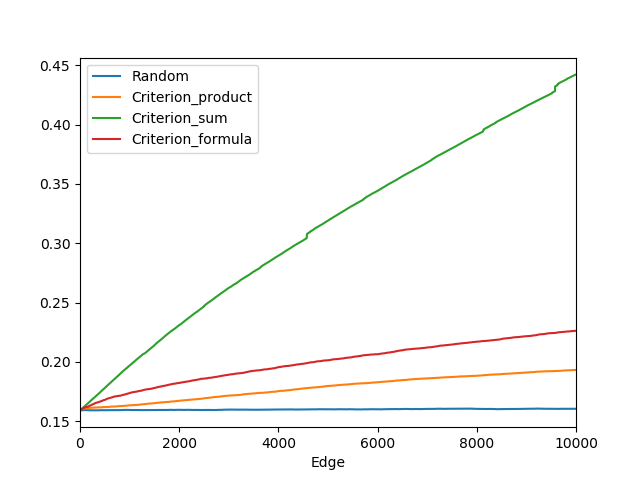

In [4]:
# Plot.
df.plot(x =0, y=[1,2,3,4])

<IPython.core.display.Javascript object>


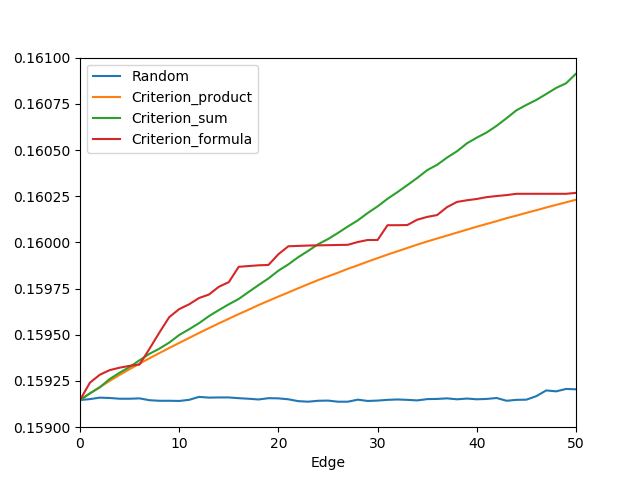

In [10]:
# Plot.
df.plot(x =0, y=[1,2,3,4], xlim=(0,50), ylim=(0.159,0.161))

In [11]:
# Load edges.
random_edges = pd.read_csv('out_random_edges.txt', sep='\t', names=['R_sources', 'R_targets'])
print("---RANDOM EDGES---")
print("Unique Sources: ", random_edges['R_sources'].nunique())
print("Unique Targets: ", random_edges['R_targets'].nunique())
print("Average targets per source", random_edges.groupby('R_sources').count().mean())
print("Average sources per target", random_edges.groupby('R_targets').count().mean())

---RANDOM EDGES---
Unique Sources:  7018
Unique Targets:  7001
Average targets per source R_targets    1.424907
dtype: float64
Average sources per target R_sources    1.428367
dtype: float64


In [12]:
print("---PRODUCT EDGES---")
one_edges = pd.read_csv('out_one_edges.txt', sep='\t', names=['1_sources', '1_targets'])
print("Unique Sources: ", one_edges['1_sources'].nunique())
print("Unique Targets: ", one_edges['1_targets'].nunique())
print("Average targets per source", one_edges.groupby('1_sources').count().mean())
print("Average sources per target", one_edges.groupby('1_targets').count().mean())

---PRODUCT EDGES---
Unique Sources:  56
Unique Targets:  3728
Average targets per source 1_targets    178.571429
dtype: float64
Average sources per target 1_sources    2.682403
dtype: float64


In [13]:
print("---SUM EDGES---")
two_edges = pd.read_csv('out_two_edges.txt', sep='\t', names=['2_sources', '2_targets'])
print("Unque Sources: ", two_edges['2_sources'].nunique())
print("Unique Targets: ", two_edges['2_targets'].nunique())
print("Average targets per source: ", two_edges.groupby("2_sources").count().mean())
print("Average sources per target: ", two_edges.groupby("2_targets").count().mean())

---SUM EDGES---
Unque Sources:  9997
Unique Targets:  3
Average targets per source:  2_targets    1.0003
dtype: float64
Average sources per target:  2_sources    3333.333333
dtype: float64


In [14]:
print("---FORMULA EDGES---")
three_edges = pd.read_csv('out_three_edges.txt', sep ='\t', names=['3_sources', '3_targets'])
print('Unique Sources: ', three_edges['3_sources'].nunique())
print('UNique Targets: ', three_edges['3_targets'].nunique())
print('Average targets per source: ', three_edges.groupby('3_sources').count().mean())
print('Average source per target: ', three_edges.groupby('3_targets').count().mean())

---FORMULA EDGES---
Unique Sources:  1129
UNique Targets:  241
Average targets per source:  3_targets    8.857396
dtype: float64
Average source per target:  3_sources    41.493776
dtype: float64


In [19]:
top_pg = pd.read_csv('out_top_by_pagerank.txt', sep = '\t')
top_pg['Value'].nunique()

7184

In [21]:
top_pg.shape

(10000, 2)

In [20]:
top_pg.head()

,Edge,Value
0,6033,0.002325
1,5939,0.001321
2,6788,0.001221
3,7829,0.001164
4,5571,0.001111


In [48]:
dp = top_pg.groupby('Value', as_index=False).count()

In [49]:
dp.sort_values(by='Edge', ascending=False)

,Value,Edge
5912,0.000137,22
4326,0.000086,15
5373,0.000114,11
4420,0.000088,11
5256,0.000110,11
...,...,...
3161,0.000066,1
3160,0.000066,1
3159,0.000066,1
3158,0.000066,1


In [65]:
dp.sort_values(by='Value', ascending=False).head(30)

,Value,Edge
7183,0.002325,1
7182,0.001321,1
7181,0.001221,1
7180,0.001164,1
7179,0.001111,1
7178,0.001065,1
7177,0.001042,1
7176,0.000994,1
7175,0.000965,1
7174,0.000948,1


In [53]:
dp.loc[dp["Edge"] == 1].describe()

,Value,Edge
count,5551.000000,5551.0
mean,0.000115,1.0
std,0.000107,0.0
min,0.000038,1.0
25%,0.000057,1.0
50%,0.000086,1.0
75%,0.000131,1.0
max,0.002325,1.0


In [51]:
dp.loc[dp['Edge'] > 1].describe()

,Value,Edge
count,1633.000000,1633.000000
mean,0.000058,2.724434
std,0.000016,1.398966
min,0.000038,2.000000
25%,0.000047,2.000000
50%,0.000055,2.000000
75%,0.000065,3.000000
max,0.000154,22.000000


In [25]:
top_redabs = pd.read_csv('out_top_by_redabsprobs.txt', sep='\t')
top_redabs.head()

,Edge,Value
0,1825,0.795213
1,1824,0.786911
2,1574,0.786911
3,11233,0.745294
4,9019,0.745294


In [26]:
top_redabs['Value'].nunique()

8087

In [66]:
dr = top_redabs.groupby('Value', as_index=False).count()
dr.sort_values(by='Edge', ascending=False).head()

,Value,Edge
4156,0.162724,18
2450,0.116710,14
2469,0.117071,10
594,0.085375,10
727,0.087261,9


In [64]:
dr.sort_values(by='Value', ascending=False).head(30)

,Value,Edge
8086,0.795213,1
8085,0.786911,2
8084,0.745294,2
8083,0.731265,1
8082,0.710114,3
8081,0.703400,1
8080,0.700346,2
8079,0.689942,2
8078,0.687718,1
8077,0.683841,1


In [61]:
dr.loc[dr['Edge'] == 1].describe()

,Value,Edge
count,6793.000000,6793.0
mean,0.197246,1.0
std,0.107008,0.0
min,0.076223,1.0
25%,0.111005,1.0
50%,0.161998,1.0
75%,0.266395,1.0
max,0.795213,1.0


In [62]:
dr.loc[dr['Edge'] > 1].describe()

,Value,Edge
count,1294.000000,1294.000000
mean,0.185836,2.478362
std,0.115919,1.118257
min,0.076241,2.000000
25%,0.101378,2.000000
50%,0.138950,2.000000
75%,0.244465,3.000000
max,0.786911,18.000000
